In [86]:
import numpy as np
import librosa as rs
import torch as th
import torchaudio.functional as F

import matplotlib.pyplot as plt   
import IPython.display as ipd

mel_rs_htk
238.25836
mel_rs_slaney
2.5609026
mel_th_htk
238.25838
mel_cpp_htk
238.25835199999997
mel_cpp_slaney
2.560905


(25.0, 45.0)

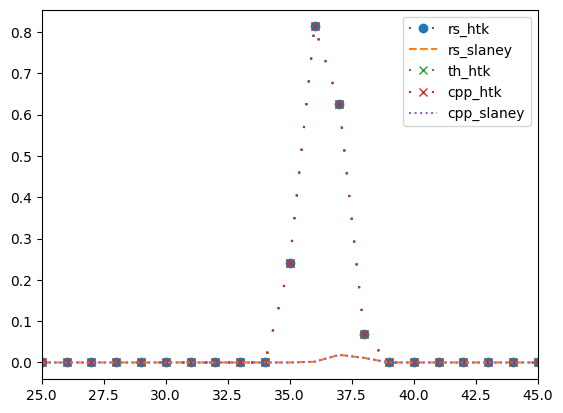

In [117]:
f_min = 20
f_max = 7600
n_fft = 512
sr = 16000
n_mels = 80

mel_rs_slaney = rs.filters.mel(sr=sr, n_mels=n_mels,n_fft=n_fft, fmin=f_min, fmax=f_max,htk=False, norm = "slaney").T
mel_rs_htk = rs.filters.mel(sr=sr, n_mels=n_mels,n_fft=n_fft, fmin=f_min, fmax=f_max, htk=True, norm = None).T
mel_th_htk = F.functional.melscale_fbanks(n_freqs = n_fft//2 + 1, f_min = f_min, f_max=f_max, n_mels = n_mels, sample_rate=sr, norm = None, mel_scale = "htk").numpy()
with open("cpp_mel_htk.txt","r") as f :
    info = f.readline()
    data = f.readline()
    data = data.split()
    data = np.array(data, dtype=float)
    mel_cpp_htk = data.reshape(80, 257).T
with open("cpp_mel_slaney.txt","r") as f :
    info = f.readline()
    data = f.readline()
    data = data.split()
    data = np.array(data, dtype=float)
    mel_cpp_slaney = data.reshape(80, 257).T

index = 30
plt.figure()

print("mel_rs_htk")
plt.plot(mel_rs_htk[:,index],'o',linestyle=(0, (1, 10)))
print(np.sum(mel_rs_htk))

print("mel_rs_slaney")
plt.plot(mel_rs_slaney[:,index],linestyle='dashed')
print(np.sum(mel_rs_slaney))

print("mel_th_htk")
plt.plot(mel_th_htk[:,index],'x',linestyle=(0, (1, 10)))
print(np.sum(mel_th_htk))

print("mel_cpp_htk")
plt.plot(mel_cpp_htk[:,index],'x',linestyle=(0, (1, 10)))
print(np.sum(mel_cpp_htk))

print("mel_cpp_slaney")
plt.plot(mel_cpp_slaney[:,index],linestyle='dotted')
print(np.sum(mel_cpp_slaney))

plt.legend(["rs_htk","rs_slaney","th_htk","cpp_htk","cpp_slaney"])

plt.xlim(25,45)


In [ ]:
plt.figure()
plt.plot(mel_cpp_htk)

In [99]:
print(rs.core.convert.hz_to_mel(1500,htk=True))
print(rs.core.convert.hz_to_mel(1500,htk=False))
print(rs.core.convert.mel_to_hz(30,htk=True))
print(rs.core.convert.mel_to_hz(30,htk=False))

1290.5574428966288
20.89752182879008
18.883860802434093
2804.644130738921
